In [1]:
from sklearn import metrics as sk_metrics

from src.metrics import *
from src.graphs import draw_graph, random_graph
from main import em_algorithm

In [2]:
%reload_ext autoreload
%autoreload 2

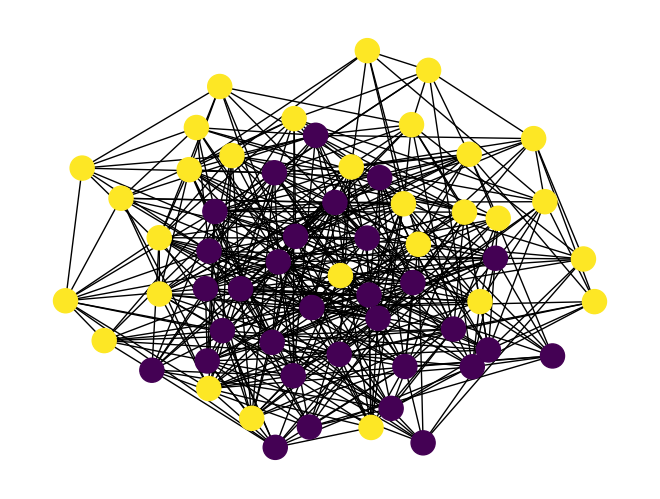

In [3]:
# Generate a random graph with SBM
Q = 2
n = 60
X, Z, _, _ = random_graph(n, Q)
draw_graph(X, Z)

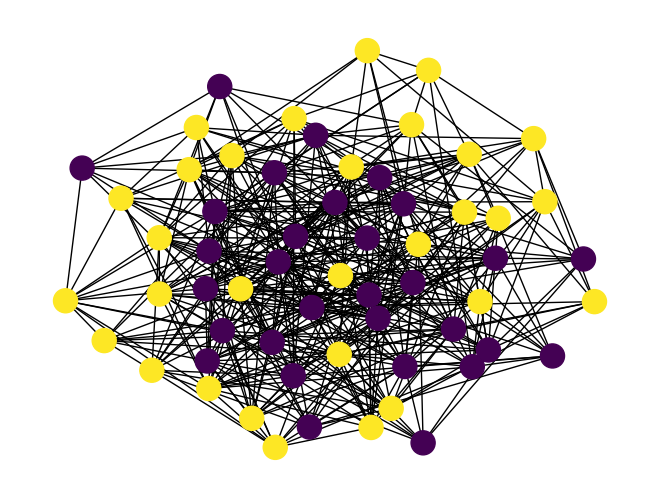

In [4]:
pred = Z.copy()
for i in range(Z.shape[0]):
    if np.random.rand() < 0.1:
        pred[i] = 1 - pred[i]
draw_graph(X, pred)

In [5]:
true_labels_labels = np.argmax(Z, axis=1)
predictions = np.argmax(pred, axis=1)
print("Rand index from sklearn: ", sk_metrics.rand_score(true_labels_labels, predictions))
print("Rand index from metrics.py: ", rand_index(true_labels_labels, predictions))

Rand index from sklearn:  0.7406779661016949
Rand index from metrics.py:  0.7406779661016949


In [6]:
true_labels_labels = np.argmax(Z, axis=1)
predictions = np.argmax(pred, axis=1)
print("MI from sklearn: ", sk_metrics.normalized_mutual_info_score(true_labels_labels, predictions))
print("MI from metrics.py: ", normalized_mutual_information(true_labels_labels, predictions))

MI from sklearn:  0.39108914763687985
MI from metrics.py:  0.39108914763688
